<a href="https://colab.research.google.com/github/jpcampos04/Sprint12_project/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>¡Hola José!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


#### Introducción

La empresa minera Zyfra busca un modelo que le ayude a predecir la cantidad de oro extraído del mineral de oro a partir de datos históricos. Se busca analizar las concentraciones de los diferentes elementos empleados para la extracción de oro en las diferentes etapas del proceso.

#### Prepara los datos

In [ ]:
# Importa las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy import stats as st

In [ ]:
# Descarga el Dataset
data_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [ ]:
# Imprime la información del Dataset
print(data_recovery_train.info())
print(data_recovery_test.info())
print(data_recovery_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has utilizado funciones estadísticas de manera efectiva para obtener una visión inicial del conjunto de datos. Este enfoque es fundamental para comprender rápidamente las características básicas del dataset y planificar los siguientes pasos del análisis.
</div>


In [ ]:
# Cambia el tipo de dato de fecha
data_recovery_train['date'] = pd.to_datetime(data_recovery_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_recovery_test['date'] = pd.to_datetime(data_recovery_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_recovery_full['date'] = pd.to_datetime(data_recovery_full['date'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has cambiado correctamente el tipo de dato de la columna de fecha a un formato datetime.
</div>


In [ ]:
# Fragmenta la fecha
data_recovery_train['year'] = data_recovery_train['date'].dt.year
data_recovery_train['month'] = data_recovery_train['date'].dt.month
data_recovery_train['day'] = data_recovery_train['date'].dt.day
data_recovery_train.drop(columns='date', inplace=True)

data_recovery_test['year'] = data_recovery_test['date'].dt.year
data_recovery_test['month'] = data_recovery_test['date'].dt.month
data_recovery_test['day'] = data_recovery_test['date'].dt.day
data_recovery_test.drop(columns='date', inplace=True)

data_recovery_full['year'] = data_recovery_full['date'].dt.year
data_recovery_full['month'] = data_recovery_full['date'].dt.month
data_recovery_full['day'] = data_recovery_full['date'].dt.day
data_recovery_full.drop(columns='date', inplace=True)

In [ ]:
# Muestra el tamaño de los Datasets
print(data_recovery_train.shape)
print(data_recovery_test.shape)
print(data_recovery_full.shape)

(16860, 89)
(5856, 55)
(22716, 89)


In [ ]:
# Muestra los primeros observaciones del Dataset
print(data_recovery_train.head())
print(data_recovery_test.head())
print(data_recovery_full.head())

   final.output.concentrate_ag  final.output.concentrate_pb  \
0                     6.055403                     9.889648   
1                     6.029369                     9.968944   
2                     6.055926                    10.213995   
3                     6.047977                     9.977019   
4                     6.148599                    10.142511   

   final.output.concentrate_sol  final.output.concentrate_au  \
0                      5.507324                    42.192020   
1                      5.257781                    42.701629   
2                      5.383759                    42.657501   
3                      4.858634                    42.689819   
4                      4.939416                    42.774141   

   final.output.recovery  final.output.tail_ag  final.output.tail_pb  \
0              70.541216             10.411962              0.895447   
1              69.266198             10.462676              0.927452   
2              68.11

In [ ]:
# Muestra los valores ausentes del Dataset
print(data_recovery_train.isna().sum())
print()
print(data_recovery_test.isna().sum())
print()
print(data_recovery_full.isna().sum())

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
year                                             0
month                                            0
day                                              0
Length: 89, dtype: int64

primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_clean

<div class="alert alert-warning">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has identificado correctamente los valores ausentes en el dataset. Considera realizar un análisis más profundo para evaluar cómo estos valores nulos podrían afectar tus resultados. Si el porcentaje de nulos es significativo, podrías explorar métodos alternativos de imputación para mejorar la calidad de los datos.

</div>


In [ ]:
# Muestra los duplicados del Dataset
print(data_recovery_train.duplicated().sum())
print()
print(data_recovery_test.duplicated().sum())
print()
print(data_recovery_full.duplicated().sum())

14

5

19


In [ ]:
print(data_recovery_train.drop_duplicates(inplace=True))
print()
print(data_recovery_test.drop_duplicates(inplace=True))
print()
print(data_recovery_full.drop_duplicates(inplace=True))

None

None

None


In [ ]:
# Elimina las observaciones con valores ausentes
data_recovery_train.dropna(inplace=True)
data_recovery_test.dropna(inplace=True)
data_recovery_full.dropna(inplace=True)

<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
Has eliminado las observaciones con valores ausentes correctamente. Sería beneficioso evaluar cómo esta eliminación afecta la representatividad de los datos. Considera realizar un análisis para verificar si las distribuciones de las variables clave se mantienen consistentes después de la eliminación de datos.
</div>


In [ ]:
print(data_recovery_train.info())
print(data_recovery_test.info())
print(data_recovery_full.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


In [ ]:
# Comprueba el cálculo de la recuperación
au_c = data_recovery_train['rougher.output.concentrate_au'] / data_recovery_train['final.output.concentrate_au']
au_f = data_recovery_train['rougher.input.feed_au'] / data_recovery_train['rougher.output.concentrate_au']
au_t = data_recovery_train['rougher.output.tail_au'] / data_recovery_train['final.output.concentrate_au']
recovery_au = (au_c * (au_f - au_t)) / (au_f * (au_c - au_t)) * 100
print(recovery_au)
print(recovery_au.mean(), 'Media del cálculo de la recuperación, conjunto de entrenamiento.')

0        97.287558
1        97.153379
2        97.275038
3        97.459205
4        97.083794
           ...    
16855    98.371143
16856    97.818004
16857    99.627824
16858    98.124624
16859    98.064310
Length: 11017, dtype: float64
98.05394836558997 Media del cálculo de la recuperación, conjunto de entrenamiento.


<div class="alert alert-block alert-warning">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El cálculo de la recuperación de oro es un paso crucial. Sería beneficioso incluir una comparación de este cálculo con los valores reportados en el dataset para asegurar que no haya discrepancias significativas. Esto garantizará la consistencia y precisión de tus resultados.
</div>


In [ ]:
# Valores fuente de rougher recovery
print(data_recovery_full['rougher.output.recovery'])
print(data_recovery_full['rougher.output.recovery'].mean(), 'Media del cálculo de la recuperación, .')

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
22711    89.574376
22712    87.724007
22713    88.890579
22714    89.858126
22715    89.514960
Name: rougher.output.recovery, Length: 16094, dtype: float64
83.5587649349388 Media del cálculo de la recuperación, .


**Observaciones**

- Existe una diferencia entre el cálculo a partir del dataset de entrenamiento respecto al dataset fuente.

In [ ]:
# Analiza las características no disponibles en el conjunto de prueba
print('Las características no disponibles en el conjunto de prueba son las siguientes:')
print()
features_unavailable = data_recovery_train.columns.difference(data_recovery_test.columns)
print(features_unavailable)

Las características no disponibles en el conjunto de prueba son las siguientes:

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       

- El tipo de parámetro de las características no disponible en el conjunto de prueba son output y calculation.

In [ ]:
numeric_train = data_recovery_train.columns.to_list()
print(numeric_train)
print()
numeric_test = data_recovery_test.columns.to_list()
print(numeric_test)

['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cle

In [ ]:
# Almacena el escalador en una variable
scaler = StandardScaler()
# Estandariza las variables numéricas del conjunto de entrenamiento
data_recovery_train[numeric_train] = scaler.fit_transform(data_recovery_train[numeric_train])
# Estandariza las variables numéricas del conjunto de prueba
data_recovery_test[numeric_test] = scaler.fit_transform(data_recovery_test[numeric_test])

<div class="alert alert-block alert-success">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Has tomado una excelente decisión al estandarizar las variables numéricas. Esto es crucial para asegurar que los algoritmos de aprendizaje automático, especialmente aquellos sensibles a las escalas de las características, funcionen de manera óptima.
</div>


#### Analiza los datos

In [ ]:
concentration =[
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.output.tail_ag',
    'rougher.output.tail_pb',
    'rougher.output.tail_sol',
    'rougher.output.tail_au',
    'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb',
    'rougher.output.concentrate_sol',
    'rougher.output.concentrate_au',
    'rougher.output.recovery',
    'primary_cleaner.output.tail_ag',
    'primary_cleaner.output.tail_pb',
    'primary_cleaner.output.tail_sol',
    'primary_cleaner.output.tail_au',
    'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
    'primary_cleaner.output.concentrate_au',
    'secondary_cleaner.output.tail_ag',
    'secondary_cleaner.output.tail_pb',
    'secondary_cleaner.output.tail_sol',
    'secondary_cleaner.output.tail_au',
    'final.output.tail_ag',
    'final.output.tail_pb',
    'final.output.tail_sol',
    'final.output.tail_au',
    'final.output.concentrate_ag',
    'final.output.concentrate_pb',
    'final.output.concentrate_sol',
    'final.output.concentrate_au',
    'final.output.recovery'
]
#print(data_recovery_full[concentration])

In [ ]:
# Segmenta el Dataset por elementos
concentration_ag = data_recovery_full[['rougher.input.feed_ag', 'rougher.output.tail_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag', 'final.output.tail_ag', 'final.output.concentrate_ag']].mean()
concentration_pb = data_recovery_full[['rougher.input.feed_pb', 'rougher.output.tail_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'final.output.tail_pb', 'final.output.concentrate_pb']].mean()
concentration_sol = data_recovery_full[['rougher.input.feed_sol', 'rougher.output.tail_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'final.output.tail_sol', 'final.output.concentrate_sol']].mean()
concentration_au = data_recovery_full[['rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au', 'final.output.tail_au', 'final.output.concentrate_au']].mean()

In [ ]:
# Segmenta el Dataset por etapa
rougher_input_feed = data_recovery_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au',]]
rougher_output_tail = data_recovery_full[['rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au',]]
rougher_output_concentrate = data_recovery_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au',]]
primary_cleaner_output_tail = data_recovery_full[['primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',]]
primary_cleaner_output_concentrate = data_recovery_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au',]]
secondary_cleaner_output_tail = data_recovery_full[['secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',]]
final_output_tail = data_recovery_full[['final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol', 'final.output.tail_au',]]
final_output_concentrate = data_recovery_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au',]]

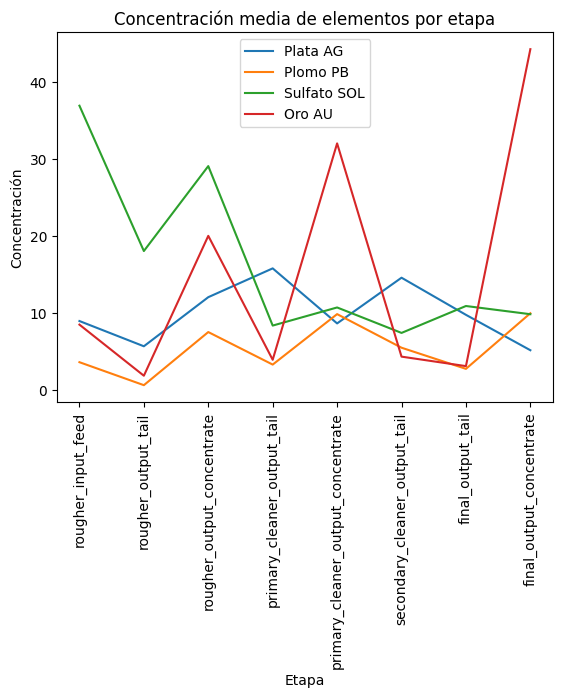

In [ ]:
# Grafica la concentración de elementos por etapa
concentration_ag
concentration_pb
concentration_sol
concentration_au

stages = ['rougher_input_feed', 'rougher_output_tail','rougher_output_concentrate', 'primary_cleaner_output_tail', 'primary_cleaner_output_concentrate', 'secondary_cleaner_output_tail', 'final_output_tail', 'final_output_concentrate'] #range(1,9)
plt.plot(stages, concentration_ag, label='Plata AG')
plt.plot(stages, concentration_pb, label='Plomo PB')
plt.plot(stages, concentration_sol, label='Sulfato SOL')
plt.plot(stages, concentration_au, label='Oro AU')

plt.xticks(ticks=stages, rotation=90)
plt.xlabel('Etapa')
plt.ylabel('Concentración')
plt.title('Concentración media de elementos por etapa')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [21]</b> <a class="tocSkip"></a><br>
La visualización de las concentraciones de elementos por etapa es muy útil. Considera añadir gráficos adicionales, como histogramas, para mostrar la distribución de concentraciones en cada etapa. Esto podría proporcionar una visión más detallada sobre la variabilidad de los datos y ayudarte a identificar patrones o anomalías.
</div>


In [ ]:
psize_data_train = data_recovery_train['rougher.input.feed_size']
psize_data_test = data_recovery_test['rougher.input.feed_size']
print(psize_data_train.mean())
print(psize_data_test.mean())

2.8893813707953606e-16
-8.447842297723651e-17


- Es notoria la diferencia entre el tamaño de particulas de la alimentación en el conjunto de entrenamiento respecto al conjunto de prueba. Esto compromete la evaluación del modelo.

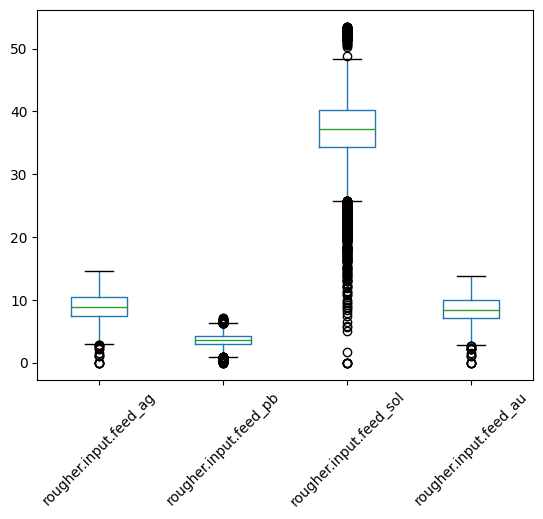

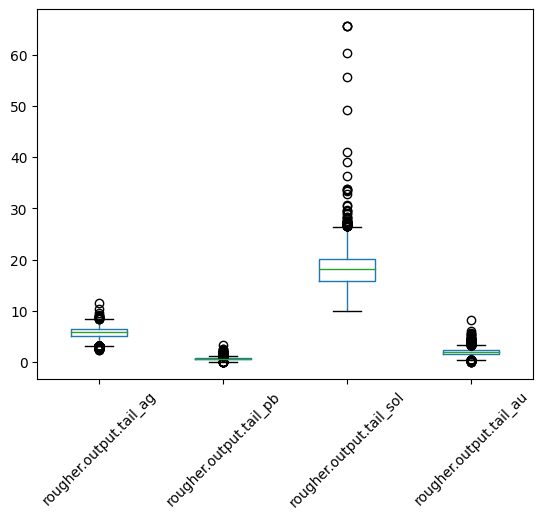

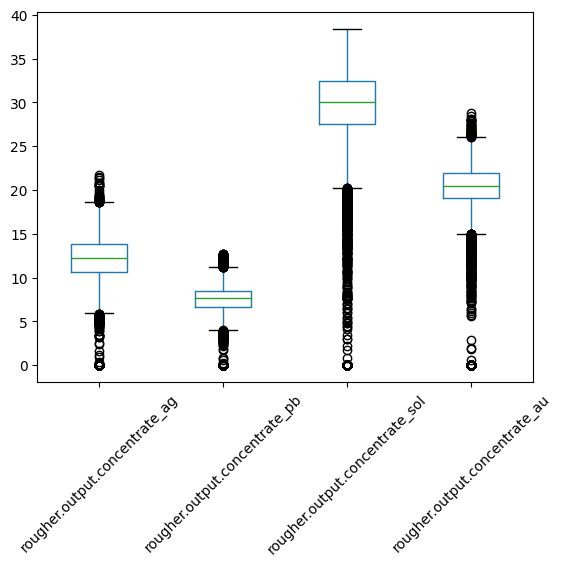

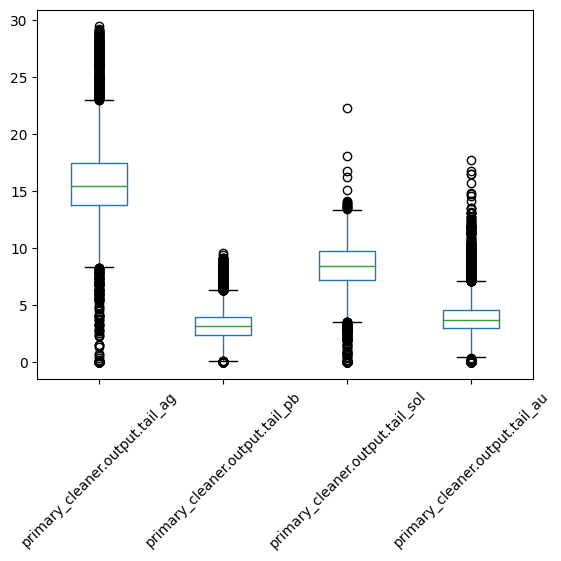

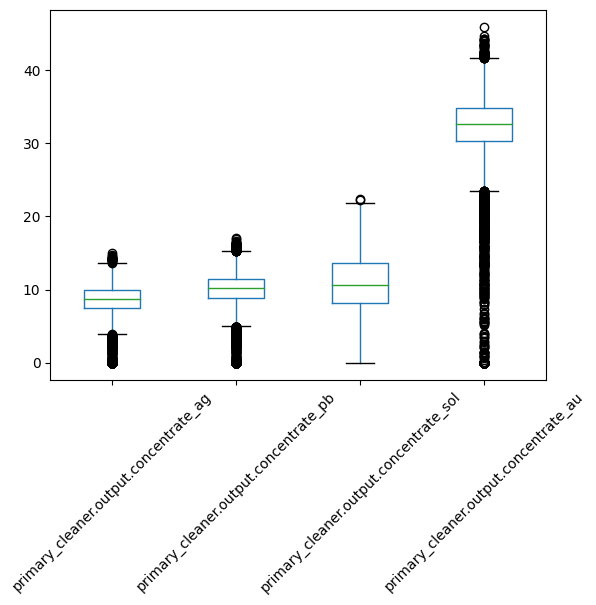

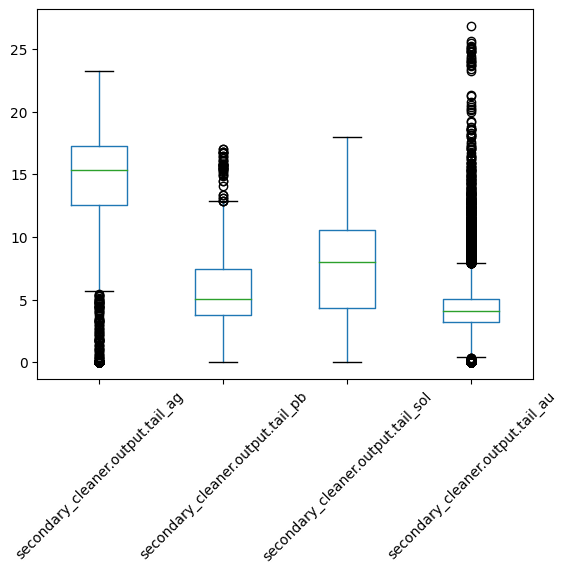

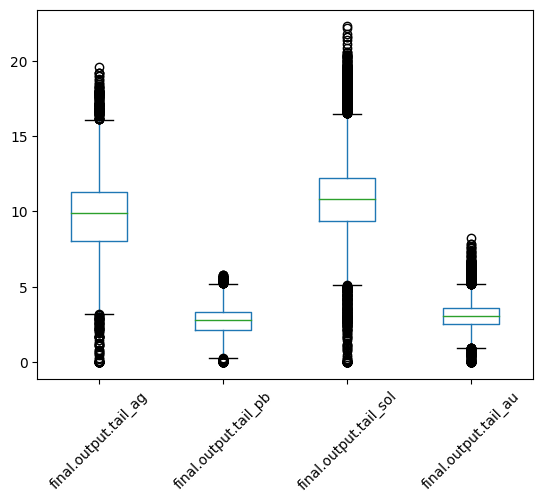

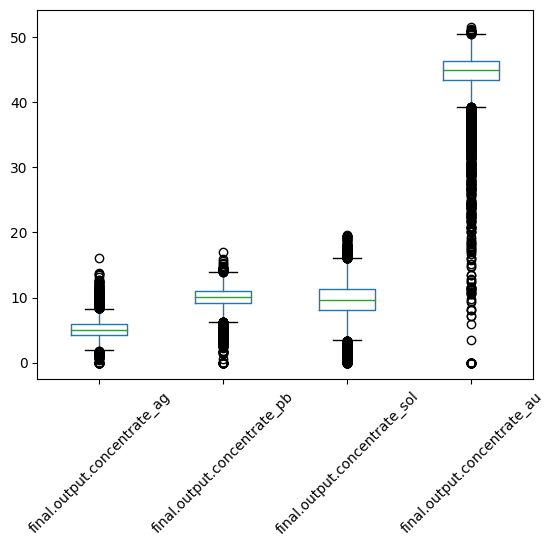

In [ ]:
# Visualiza las concentraciones de las sustancias en las diferentes etapas
rougher_input_feed.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

rougher_output_tail.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

rougher_output_concentrate.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

primary_cleaner_output_tail.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

primary_cleaner_output_concentrate.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

secondary_cleaner_output_tail.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

final_output_tail.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

final_output_concentrate.plot(kind="box")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
Los diagramas de caja son una excelente manera de visualizar la distribución de los datos y detectar valores atípicos. Sería útil incluir una breve interpretación de estos gráficos para resaltar cualquier observación relevante que pueda influir en el análisis. Esto ayudará a contextualizar los hallazgos y a tomar decisiones informadas.
</div>


In [ ]:
# Filtra las observaciones que no poseen valores atípicos en ninguna de sus etapas
filtered_df_train = data_recovery_train.copy()

for col in filtered_df_train[numeric_train]:
    Q1 = filtered_df_train[col].quantile(0.25)
    Q3 = filtered_df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filtro dentro del rango aceptable
    mask = (filtered_df_train[col] >= Q1 - 1.5 * IQR) & (filtered_df_train[col] <= Q3 + 1.5 * IQR)

    # Aplica el filtro
    filtered_df_train = filtered_df_train[mask]

print(filtered_df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 6589 to 11142
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         756 non-null    float64
 1   final.output.concentrate_pb                         756 non-null    float64
 2   final.output.concentrate_sol                        756 non-null    float64
 3   final.output.concentrate_au                         756 non-null    float64
 4   final.output.recovery                               756 non-null    float64
 5   final.output.tail_ag                                756 non-null    float64
 6   final.output.tail_pb                                756 non-null    float64
 7   final.output.tail_sol                               756 non-null    float64
 8   final.output.tail_au                                756 non-null    float64

- Las observaciones que poseen valores atípicos en sus diferentes etapas la muestra son cerca del 93% de las observaciones por lo que eliminarlas dejaría la muestra inútil para entrenar al modelo por lo que se decide conservar los valores atípicos.

#### Construye el modelo

In [ ]:
# Función para calcular sMAPE
def sMAPE(target, predictions):
    difference = (target - predictions)
    denominator = (target + predictions) / 2
    mask = denominator != 0
    smape = (difference[mask] / denominator[mask]).mean() * 100
    return smape

<div class="alert alert-block alert-success">
<b>Celda [25]</b> <a class="tocSkip"></a><br>
La implementación de la función sMAPE es un excelente paso para evaluar el rendimiento del modelo de manera más robusta. Esta métrica es especialmente útil para comparar modelos en contextos donde los valores pueden variar significativamente, asegurando una evaluación justa y consistente.
</div>


In [ ]:
# Divide las características y el objetivo
features = data_recovery_train.drop('rougher.output.recovery', axis=1)
target = data_recovery_train['rougher.output.recovery']

# Divide los datos para entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)

(8262, 88)
(2755, 88)


In [ ]:
intercepts = [True, False]
subsamples = [3, 5, 7]
best_score = 0
best_intercept = 0
best_subsample = 0
best_smape = 0
best_iteration = 0
count = 0

for intercept in intercepts:
    model_lr = LinearRegression(fit_intercept=intercept)
    # entrena el modelo en el conjunto de entrenamiento
    model_lr.fit(features_train, target_train)
    # obtiene las predicciones del modelo en el conjunto de validación
    predictions_valid = model_lr.predict(features_valid)
    # Obtiene el error cuadratico medio
    ecm_mse = mean_squared_error(target_valid, predictions_valid)
    # Obtiene la raíz del error cuadratico medio
    rmse = ecm_mse ** 0.5
    # Obtiene el error absoluto medio
    mae = mean_absolute_error(target_valid, predictions_valid)
    # Obtiene el error medio porcentual simétrico
    smape = sMAPE(target_valid, predictions_valid)

    for subsample in subsamples:
        count += 1
        scores = cross_val_score(model_lr, features, target, cv=subsample)
        final_score = sum(scores) / len(scores)

        # Imprime las metricas por iteración
        print('Iteración', count)
        print('Media predicciones:', predictions_valid.mean())
        print('RMSE:', rmse)
        print('MAE:', mae)
        print('sMAPE:', smape)
        print('Calidad media modelo:', final_score)
        print()

        if final_score > best_score:
            best_score = final_score
            best_intercept = intercept
            best_subsample = subsample
            best_smape = smape
            best_iteration = count

print('La mejor iteración fue la #', best_iteration, 'siendo el mejor intercept para el modelo', best_intercept, 'con un subconjuto', best_subsample)
print('con un error medio absoluto porcentual simético de ', best_smape)
print('La mejor calidad promedio fue', best_score)

Iteración 1
Media predicciones: 0.006969936619591347
RMSE: 0.36394033335981923
MAE: 0.19664764775967564
sMAPE: 29.27310393878167
Calidad media modelo: 0.6150078945746825

Iteración 2
Media predicciones: 0.006969936619591347
RMSE: 0.36394033335981923
MAE: 0.19664764775967564
sMAPE: 29.27310393878167
Calidad media modelo: 0.6141473387698126

Iteración 3
Media predicciones: 0.006969936619591347
RMSE: 0.36394033335981923
MAE: 0.19664764775967564
sMAPE: 29.27310393878167
Calidad media modelo: 0.40752168749427653

Iteración 4
Media predicciones: 0.005688233939390624
RMSE: 0.3639232236386752
MAE: 0.19661743238875212
sMAPE: -14.7122778421028
Calidad media modelo: 0.699851322975933

Iteración 5
Media predicciones: 0.005688233939390624
RMSE: 0.3639232236386752
MAE: 0.19661743238875212
sMAPE: -14.7122778421028
Calidad media modelo: 0.7565364304790727

Iteración 6
Media predicciones: 0.005688233939390624
RMSE: 0.3639232236386752
MAE: 0.19661743238875212
sMAPE: -14.7122778421028
Calidad media model

<div class="alert alert-block alert-warning">
<b>Celda [27]</b> <a class="tocSkip"></a><br>
El enfoque de validación cruzada es muy apropiado para evaluar la estabilidad del modelo. Considera incluir una discusión sobre cómo las diferentes configuraciones de hiperparámetros afectan el rendimiento del modelo. Explicar cómo seleccionaste la mejor configuración proporcionará una comprensión más profunda de tus decisiones de modelado.
</div>


In [ ]:
subsamples = [3, 5, 7]
best_min_split = 0
best_score = 0
best_depth = 0
count = 0

for depth in range(1, 5): # selecciona el rango del hiperparámetro
    for min_split in range (2,6):
        model_dt = DecisionTreeRegressor(max_depth=depth, random_state=12345, min_samples_split=min_split) # inicializa el constructor de modelos con los parámetros random_state=12345 y max_depth=depth
        model_dt.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model_dt.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
        # Obtiene el error cuadratico medio
        ecm_mse = mean_squared_error(target_valid, predictions_valid)
        # Obtiene la raíz del error cuadratico medio
        rmse = ecm_mse ** 0.5
        # Obtiene el error absoluto medio
        mae = mean_absolute_error(target_valid, predictions_valid)
        # Obtiene el error medio porcentual simétrico
        smape = sMAPE(target_valid, predictions_valid)

        for subsample in subsamples:
            count += 1
            scores = cross_val_score(model_dt, features, target, cv=subsample)
            final_score = sum(scores) / len(scores)

            # Imprime las metricas por iteración
            print('Iteración', count)
            print('Media predicciones:', predictions_valid.mean())
            print('RMSE:', rmse)
            print('MAE:', mae)
            print('sMAPE:', smape)
            print('Calidad media modelo:', final_score)
            print()

            if final_score > best_score:
                best_score = final_score
                best_depth = depth
                best_split = min_split
                best_subsample = subsample
                best_smape = smape
                best_iteration = count

print('La mejor iteración fue la #', best_iteration, 'siendo la mejor profundidad', best_depth, 'con un mínimo de muestras para split', best_split)
print('con un error medio absoluto porcentual simético de ', best_smape)
print('La mejor calidad promedio fue', best_score)

Iteración 1
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media modelo: 0.3898587191769032

Iteración 2
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media modelo: 0.4278045404279938

Iteración 3
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media modelo: -0.010092035729212499

Iteración 4
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media modelo: 0.3898587191769032

Iteración 5
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media modelo: 0.4278045404279938

Iteración 6
Media predicciones: 0.012180070467248966
RMSE: 0.5571720172969216
MAE: 0.41392130828861445
sMAPE: 312.1636117955714
Calidad media model

In [ ]:
subsamples = [3, 5, 7]
estimators = [100, 200, 300]
best_score = 0
best_depth = 0
count = 0

for depth in range(1, 5): # selecciona el rango del hiperparámetro
    for estimator in estimators:
        model_rf = RandomForestRegressor(max_depth=depth, random_state=12345, n_estimators=estimator) # inicializa el constructor de modelos con los parámetros random_state=12345 y max_depth=depth
        model_rf.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model_rf.predict(features_valid) # obtén las predicciones del modelo en el conjunto de validación
        # Obtiene el error cuadratico medio
        ecm_mse = mean_squared_error(target_valid, predictions_valid)
        # Obtiene la raíz del error cuadratico medio
        rmse = ecm_mse ** 0.5
        # Obtiene el error absoluto medio
        mae = mean_absolute_error(target_valid, predictions_valid)
        # Obtiene el error medio porcentual simétrico
        smape = sMAPE(target_valid, predictions_valid)

        for subsample in subsamples:
            count += 1
            scores = cross_val_score(model_dt, features, target, cv=subsample)
            final_score = sum(scores) / len(scores)

            # Imprime las metricas por iteración
            print('Iteración', count)
            print('Media predicciones:', predictions_valid.mean())
            print('RMSE:', rmse)
            print('MAE:', mae)
            print('sMAPE:', smape)
            print('Calidad media modelo:', final_score)
            print()

            if final_score > best_score:
                best_score = final_score
                best_depth = depth
                best_estimators = estimator
                best_subsample = subsample
                best_smape = smape
                best_iteration = count

print('La mejor iteración fue la #', best_iteration, 'siendo la mejor profundidad', best_depth, 'con un # de estimadores de', best_estimators)
print('con un error medio absoluto porcentual simético de ', best_smape)
print('La mejor calidad promedio fue', best_score)

Iteración 1
Media predicciones: 0.011620920368963256
RMSE: 0.5571617931824371
MAE: 0.413952693375372
sMAPE: -50.17910794032744
Calidad media modelo: 0.6564872906933129

Iteración 2
Media predicciones: 0.011620920368963256
RMSE: 0.5571617931824371
MAE: 0.413952693375372
sMAPE: -50.17910794032744
Calidad media modelo: 0.715633571843633

Iteración 3
Media predicciones: 0.011620920368963256
RMSE: 0.5571617931824371
MAE: 0.413952693375372
sMAPE: -50.17910794032744
Calidad media modelo: 0.554831257375204

Iteración 4
Media predicciones: 0.01172368285643691
RMSE: 0.5571108907909212
MAE: 0.41393717763341736
sMAPE: 26.991990433798264
Calidad media modelo: 0.6564872906933129

Iteración 5
Media predicciones: 0.01172368285643691
RMSE: 0.5571108907909212
MAE: 0.41393717763341736
sMAPE: 26.991990433798264
Calidad media modelo: 0.715633571843633

Iteración 6
Media predicciones: 0.01172368285643691
RMSE: 0.5571108907909212
MAE: 0.41393717763341736
sMAPE: 26.991990433798264
Calidad media modelo: 0.5548

<div class="alert alert-block alert-warning">
<b>Celda [29]</b> <a class="tocSkip"></a><br>
Al entrenar el modelo Random Forest, sería beneficioso incluir un análisis de importancia de las características. Esto te permitirá entender mejor qué variables están contribuyendo más al rendimiento del modelo, proporcionando información valiosa para futuras mejoras y optimizaciones.
</div>


#### Conclusión

- Existe una diferencia entre el cálculo a partir del dataset de entrenamiento respecto al dataset fuente.
- El tipo de parámetro de las características no disponible en el conjunto de prueba son output y calculation.
- Se observa que en las etapas de concentracion hay un aumento de los diferentes elementos mientras que en las etapas de colas disminuyen la presencia de los diferentes elementos.
- Las observaciones del conjunto de prueba poseen valores atípicos en sus diferentes etapas la muestra, cerca del 93% de las observaciones por lo que eliminarlas dejaría la muestra inútil para entrenar al modelo por lo que se decide conservar los valores atípicos.
- El modelo con mayor calificación fue la regresión lineal, con un interceptor marcado como Falso, con una validación cruzada con 5 subconjuntos, con un error medio absoluto porcentual simético de -14.71 y la mejor calidad promedio fue 0.75

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, José! A lo largo del proyecto mostraste fortalezas muy claras:
    
<br><br>
- Implementaste correctamente la carga y revisión inicial de los datos, asegurando un buen punto de partida para el análisis.
- Cambiaste el tipo de dato de la fecha de manera adecuada, lo cual es crucial para cualquier análisis temporal.
- Realizaste un análisis exhaustivo de valores ausentes y duplicados, asegurando la limpieza de los datos.
- Estandarizaste las variables numéricas, lo cual es esencial para el correcto funcionamiento de los modelos.
- Utilizaste visualizaciones efectivas para explorar las concentraciones de elementos en diferentes etapas.
- Implementaste una función personalizada para calcular sMAPE, mostrando tu habilidad para evaluar el rendimiento del modelo.
- Aplicaste técnicas de validación cruzada para evaluar la estabilidad de los modelos, lo cual es una práctica recomendada.
- Exploraste diferentes configuraciones de hiperparámetros en tus modelos, demostrando un enfoque riguroso en la optimización de modelos.
- Mostraste un entendimiento claro de las métricas de evaluación y su interpretación.
- Mantuviste un flujo de trabajo organizado y bien documentado, lo cual facilita la comprensión del proyecto.
<br>

¡Felicidades!
</div>
